# **PNEUMONIA DETECTION BY XRAY IMAGES**
BY:
NIRANJAN JAIN,
SANJAY GHODAWAT UNIVERSITY


IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

DEFINING PATH

In [2]:
trainpath = '../input/chest-xray-pneumonia/chest_xray/train/'
testpath = '../input/chest-xray-pneumonia/chest_xray/test/'
predpath = '../input/chest-xray-pneumonia/chest_xray/val/'

CUSTOM APPROACH FOR VARIABLE ENCODING

In [3]:
code = {'NORMAL':0 ,'PNEUMONIA':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

IMAGE SIZE TO BE 224 X 224

In [4]:
s=224

GETTING TRAINING DATA:

In [5]:
X_train = []
y_train = []
 
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str(trainpath + folder + '/*.jpeg'))
    
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

SIZE OF TRAINING DATA:

In [6]:
print("we have {} items in X_train".format(len(X_train)))

we have 5216 items in X_train


GETTING TESTING DATA:

In [7]:
X_test = []
y_test = []

for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str(predpath + folder + '/*.jpeg'))
    
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

SIZE OF TESTING DATA:

In [8]:
print("we have {} items in X_test".format(len(X_test)))

we have 16 items in X_test


CONVERTING THE LIST DATA TO NUMPY ARRAYS

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_test shape  is {y_test.shape}')


X_train shape  is (5216, 224, 224, 3)
y_train shape  is (5216,)
X_test shape  is (16, 224, 224, 3)
y_test shape  is (16,)


LETS HAVE A LOOK AT SOME OF THE DATA

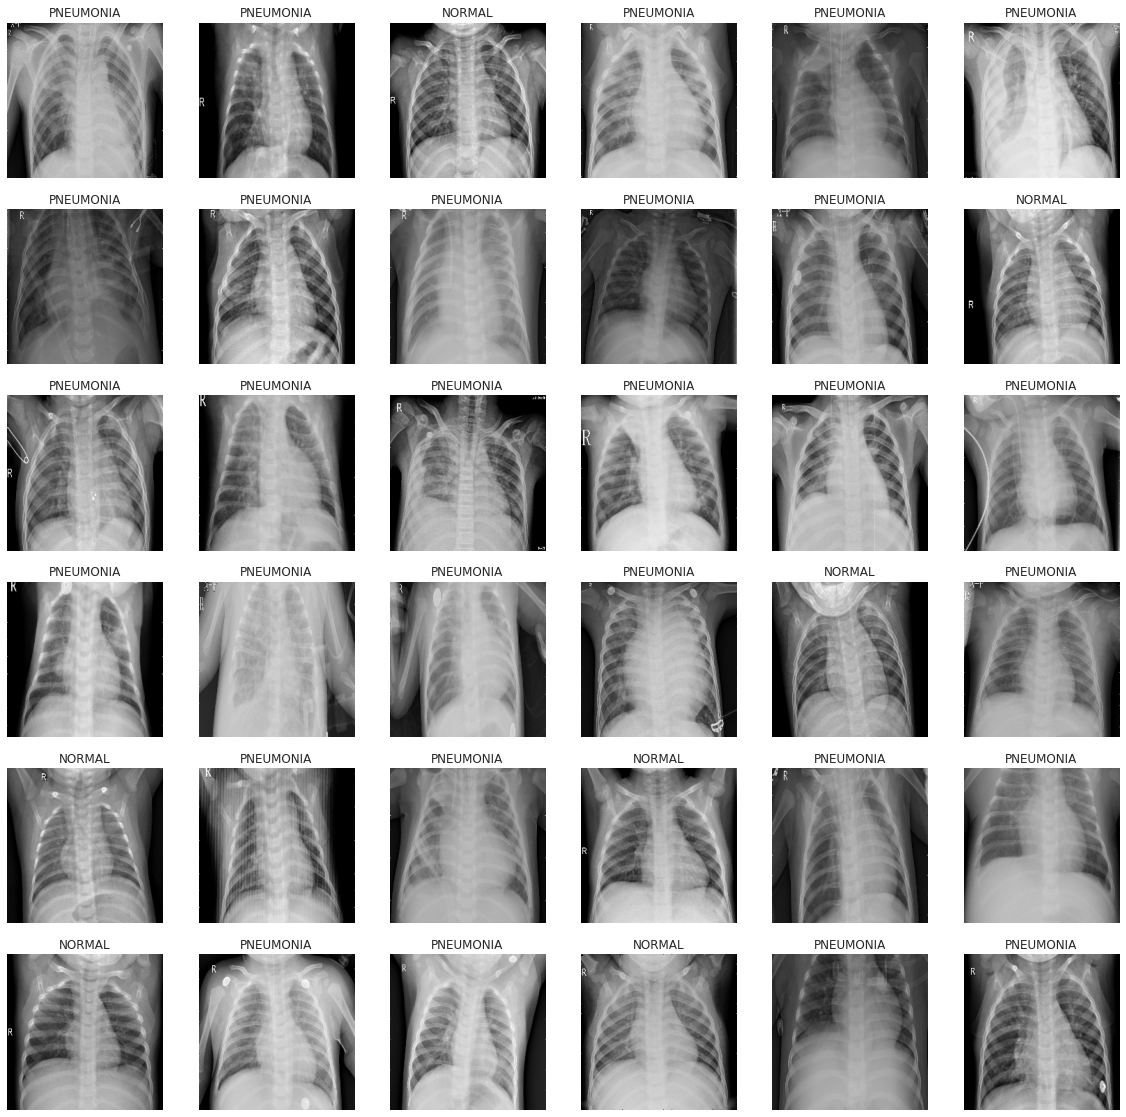

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

DEFINING THE MODEL:

In [12]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(4,4),        
        keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
        keras.layers.MaxPool2D(4,4),        
        keras.layers.Conv2D(128,kernel_size=(5,5),activation='relu'),    
        keras.layers.Flatten(),    
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
        keras.layers.ActivityRegularization(l1=0, l2=0.0001)
])


COMPILING THE MODEL

In [13]:
KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None,

FITTING THE DATA TO THE MODEL:

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
ES = EarlyStopping(monitor='val_accuracy',
                  min_delta=0,
                  patience=0,
                  verbose=0, mode='max')
        
MC = ModelCheckpoint('PNEUMONIAModel.h5',                    
                     monitor='val_accuracy',                 
                     mode='max',                  
                     save_best_only=True, 
                     verbose=1)   
ThisModel = KerasModel.fit(X_train, y_train, callbacks=[MC], epochs=12, batch_size=35, verbose=1, validation_data=(X_test,y_test))

Epoch 1/12
150/150 [==============================] - ETA: 0s - loss: 2.0553 - accuracy: 0.8903
Epoch 00001: val_accuracy improved from -inf to 0.81250, saving model to PNEUMONIAModel.h5
150/150 [==============================] - 3s 21ms/step - loss: 2.0553 - accuracy: 0.8903 - val_loss: 0.4000 - val_accuracy: 0.8125
Epoch 2/12
148/150 [============================>.] - ETA: 0s - loss: 0.1104 - accuracy: 0.9593
Epoch 00002: val_accuracy did not improve from 0.81250
150/150 [==============================] - 3s 19ms/step - loss: 0.1098 - accuracy: 0.9595 - val_loss: 0.7731 - val_accuracy: 0.6250
Epoch 3/12
148/150 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9672
Epoch 00003: val_accuracy did not improve from 0.81250
150/150 [==============================] - 3s 18ms/step - loss: 0.0904 - accuracy: 0.9661 - val_loss: 0.4881 - val_accuracy: 0.8125
Epoch 4/12
148/150 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9637
Epoch 00004: val_ac

CHECKING THE PERFORMANCE BY VARIOUS PARAMETERS:

In [15]:
from keras.models import load_model
model = load_model('./PNEUMONIAModel.h5')
y_pred1a = model.predict(X_test, verbose=1)
y_pred1a=y_pred1a[:,0]
y_pred1a=(np.round(y_pred1a)).astype(int)


from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE IS: {}".format(accuracy_score(y_test, y_pred1a)))
from sklearn.metrics import roc_auc_score
print("THE AUCROC SCORE IS: {}".format(roc_auc_score(y_test, y_pred1a)))
from sklearn.metrics import f1_score
print("THE F1 SCORE IS: {}".format(f1_score(y_test, y_pred1a)))
from sklearn.metrics import average_precision_score
print("THE PRAUC SCORE IS: {}".format(average_precision_score(y_test, y_pred1a)))

1/1 [==============================] - 0s 1ms/step
THE ACCURACY SCORE IS: 1.0
THE AUCROC SCORE IS: 1.0
THE F1 SCORE IS: 1.0
THE PRAUC SCORE IS: 1.0


PLOTTING THE RESULTS:

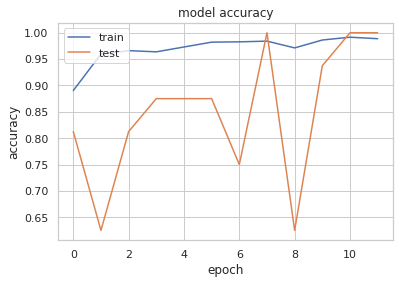

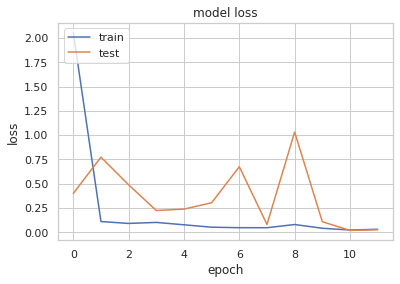

In [16]:

# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

IMPORTING THE MODEL

In [17]:
from keras.models import load_model
model = load_model('./PNEUMONIAModel.h5')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


PREDICTING THE IMAGE

In [18]:
from keras.preprocessing import image
image = "../input/trytry/try.jpeg"
image = cv2.imread(image)
image = cv2.resize(image,(s,s))
image = np.expand_dims(image, axis = 0)
image = np.array(image)
result = model.predict(image)
result = int(round(result[:,0][0]))

print(getcode(int(result)))

PNEUMONIA


IN CASE YOU WANT TO DOWNLOAD THE MODEL

In [1]:
from IPython.display import FileLink
FileLink(r'./PNEUMONIAModel.h5')

C:\Users\Niranjan\Downloads\need\PNEUMONIAModel.h5